## 下载数据

In [23]:
# csv文件格式,以逗号分隔
import csv
from matplotlib import pyplot as plt
from datetime import datetime #添加日期

In [30]:
filename = 'sitka_weather_07-2014.csv'
with open(filename) as f:  #将结果文件对象存储在f中
    reader = csv.reader(f) #传递实参,创建关联阅读器
    header_row = next(reader) #next函数返回文件中的下一行 调用一次返回第一行
    print(header_row) #以逗号分隔,储存在列表
    for index,column_header in enumerate(header_row): #enumerate()函数获取每个元素的索引及其值
        print(index,column_header) #打印文件头

#从文件中获得最高气温和日期
    dates, highs = [], []
    for row in reader:
        current_date = datetime.strptime(row[0],"%Y-%m-%d") #方法strptime(),第二个实参设置日期的格式
# %A:Monday %B:January %m:1月 %d:01~31 %Y:2015 %y:15 %H:00~23 %I:01~12 %p:am/pm %M:00~59 %S:00~61
        dates.append(current_date)
        high = int(row[1]) #遍历文件各行,将字符串转换为数字
        highs.append(high) 
    print(highs)

['AKDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF', 'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity', ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn', ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn', ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles', ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH', 'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees']
0 AKDT
1 Max TemperatureF
2 Mean TemperatureF
3 Min TemperatureF
4 Max Dew PointF
5 MeanDew PointF
6 Min DewpointF
7 Max Humidity
8  Mean Humidity
9  Min Humidity
10  Max Sea Level PressureIn
11  Mean Sea Level PressureIn
12  Min Sea Level PressureIn
13  Max VisibilityMiles
14  Mean VisibilityMiles
15  Min VisibilityMiles
16  Max Wind SpeedMPH
17  Mean Wind SpeedMPH
18  Max Gust SpeedMPH
19 PrecipitationIn
20  CloudCover
21  Events
22  WindDirDegrees
[64, 71, 64, 59, 69, 62, 61, 55, 57, 61, 57, 59, 57, 61, 64, 61, 59, 63, 60, 57

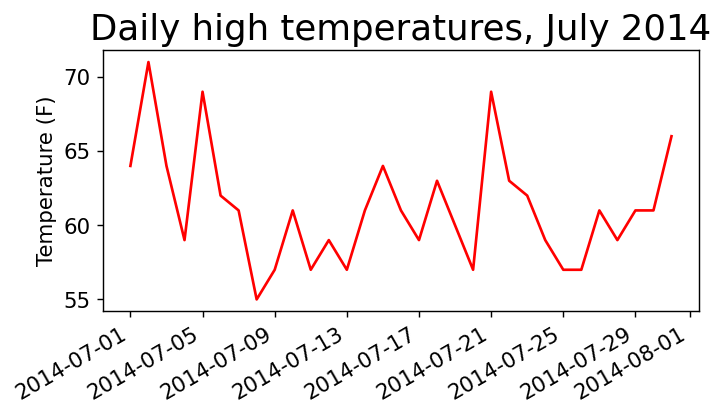

In [31]:
fig = plt.figure(dpi=128,figsize=(6,3))
plt.plot(dates,highs,c='red')
plt.title("Daily high temperatures, July 2014",fontsize=20)
plt.xlabel('',fontsize=12)
fig.autofmt_xdate() #绘制斜的日期标签
plt.ylabel("Temperature (F)",fontsize=12)
plt.tick_params(axis='both',which ='major',labelsize=12)
plt.show()

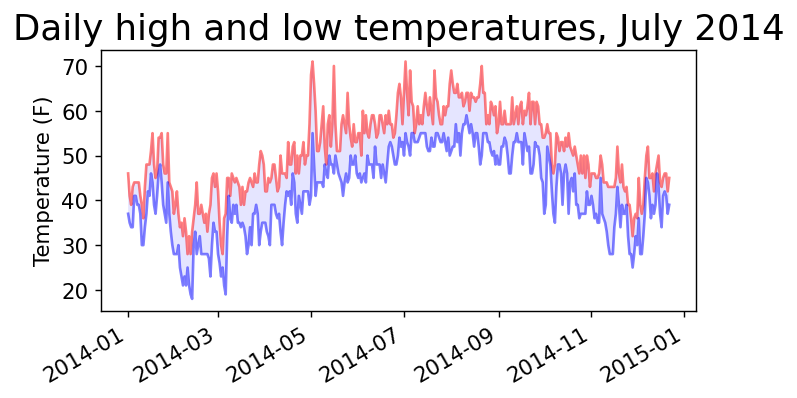

In [44]:
filename = 'sitka_weather_2014.csv'
with open(filename) as f:  #将结果文件对象存储在f中
    reader = csv.reader(f) #传递实参,创建关联阅读器
    header_row = next(reader) #next函数返回文件中的下一行 调用一次返回第一行
    
    dates, highs,lows = [], [], []
    for row in reader:
        current_date = datetime.strptime(row[0],"%Y-%m-%d") #方法strptime(),第二个实参设置日期的格式
        dates.append(current_date)
        high = int(row[1]) #遍历文件各行,将字符串转换为数字
        highs.append(high) 
        low = int(row[3]) #遍历文件各行,将字符串转换为数字
        lows.append(low) 
        
fig = plt.figure(dpi=128,figsize=(6,3))
plt.plot(dates,highs,c='red',alpha=0.5) #alpha表示透明程度
plt.plot(dates,lows,c='blue',alpha=0.5)
plt.fill_between(dates,highs,lows,facecolor='blue',alpha=0.1) #调用方法填充两个y值中的空间
plt.title("Daily high and low temperatures, July 2014",fontsize=20)
plt.xlabel('',fontsize=12)
fig.autofmt_xdate() #绘制斜的日期标签
plt.ylabel("Temperature (F)",fontsize=12)
plt.tick_params(axis='both',which ='major',labelsize=12)
plt.show()

2014-02-16 00:00:00 missing data


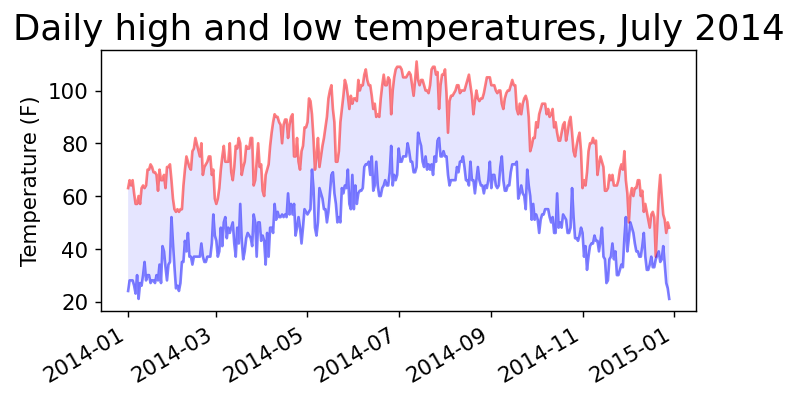

In [45]:
filename = 'death_valley_2014.csv'
with open(filename) as f:  #将结果文件对象存储在f中
    reader = csv.reader(f) #传递实参,创建关联阅读器
    header_row = next(reader) #next函数返回文件中的下一行 调用一次返回第一行
    
    dates, highs,lows = [], [], []
    for row in reader:
        try:
            current_date = datetime.strptime(row[0],"%Y-%m-%d") #方法strptime(),第二个实参设置日期的格式
            high = int(row[1]) #遍历文件各行,将字符串转换为数字
            low = int(row[3]) #遍历文件各行,将字符串转换为数字
        except ValueError:  #进行错误检查,排除缺失数据
            print(current_date,'missing data')
        else:
            lows.append(low) 
            highs.append(high)
            dates.append(current_date)
        
fig = plt.figure(dpi=128,figsize=(6,3))
plt.plot(dates,highs,c='red',alpha=0.5) #alpha表示透明程度
plt.plot(dates,lows,c='blue',alpha=0.5)
plt.fill_between(dates,highs,lows,facecolor='blue',alpha=0.1) #调用方法填充两个y值中的空间
plt.title("Daily high and low temperatures, July 2014",fontsize=20)
plt.xlabel('',fontsize=12)
fig.autofmt_xdate() #绘制斜的日期标签
plt.ylabel("Temperature (F)",fontsize=12)
plt.tick_params(axis='both',which ='major',labelsize=12)
plt.show()

In [53]:
#制作交易收盘价走势图
#下载数据
import requests #第三方模块requests

json_url = 'https://raw.githubusercontent.com/muxuezi/btc/master/btc_close_2017.json'
req = requests.get(json_url) #get向服务器发送请求
with open('btc_close_2017_request.json','w') as f:
    f.write(req.text) #text属性直接读取数据文件,返回字符串格式
file_requests = req.json()

ProxyError: HTTPSConnectionPool(host='raw.githubusercontent.com', port=443): Max retries exceeded with url: /muxuezi/btc/master/btc_close_2017.json (Caused by ProxyError('Cannot connect to proxy.', NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fec5cb07d60>: Failed to establish a new connection: [Errno 111] Connection refused')))

In [58]:
import json
filename = 'btc_close_2017.json'
with open(filename) as f:
    btc_data = json.load(f)
for btc_dict in btc_data:
    date = btc_dict['date']
    month = int(btc_dict['month'])
    week = int(btc_dict['week'])
    weekday = btc_dict['weekday']
    close = int(float(btc_dict['close'])) #把小数先转化为浮点数,在转化为整数
    print("{} is month {} week {}, {}, the close price is {}RMB".format(date,month,week,weekday,close))

2017-01-01 is month 1 week 52, Sunday, the close price is 6928RMB
2017-01-02 is month 1 week 1, Monday, the close price is 7070RMB
2017-01-03 is month 1 week 1, Tuesday, the close price is 7175RMB
2017-01-04 is month 1 week 1, Wednesday, the close price is 7835RMB
2017-01-05 is month 1 week 1, Thursday, the close price is 6928RMB
2017-01-06 is month 1 week 1, Friday, the close price is 6196RMB
2017-01-07 is month 1 week 1, Saturday, the close price is 6262RMB
2017-01-08 is month 1 week 1, Sunday, the close price is 6319RMB
2017-01-09 is month 1 week 2, Monday, the close price is 6239RMB
2017-01-10 is month 1 week 2, Tuesday, the close price is 6263RMB
2017-01-11 is month 1 week 2, Wednesday, the close price is 5383RMB
2017-01-12 is month 1 week 2, Thursday, the close price is 5566RMB
2017-01-13 is month 1 week 2, Friday, the close price is 5700RMB
2017-01-14 is month 1 week 2, Saturday, the close price is 5648RMB
2017-01-15 is month 1 week 2, Sunday, the close price is 5674RMB
2017-01-

['2017-01-01', '2017-01-21', '2017-02-10', '2017-03-02', '2017-03-22', '2017-04-11', '2017-05-01', '2017-05-21', '2017-06-10', '2017-06-30', '2017-07-20', '2017-08-09', '2017-08-29', '2017-09-18', '2017-10-08', '2017-10-28', '2017-11-17', '2017-12-07']


ModuleNotFoundError: No module named 'cairosvg'

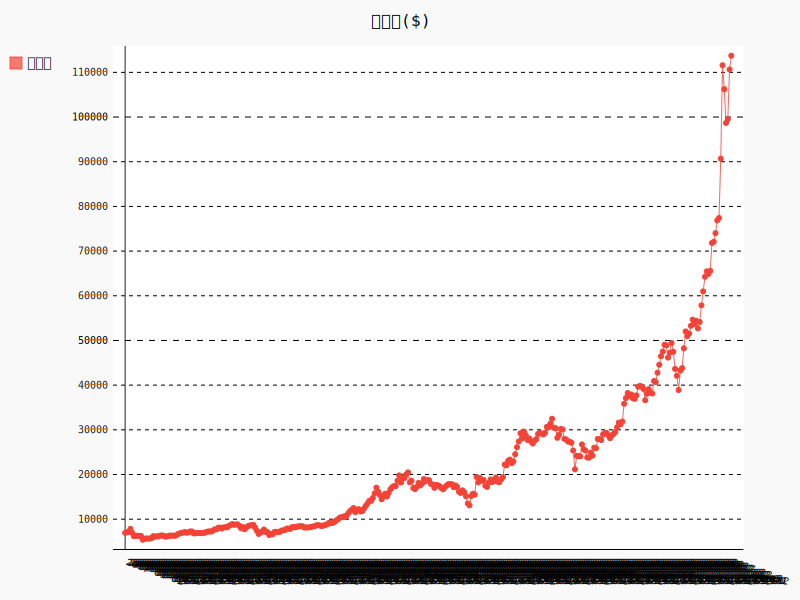

In [88]:
dates = []
months = []
weeks = []
weekdays = []
close = []
for btc_dict in btc_data:
    dates.append(btc_dict['date'])
    months.append(int(btc_dict['month']))
    weeks.append(int(btc_dict['week']))
    weekdays.append(btc_dict['weekday'])
    close.append((float(btc_dict['close'])))
import pygal
line_chart = pygal.Line(x_label_rotation=20,show_minor_x_label=False)
line_chart.title = '收盘价($)'
line_chart.x_labels = dates
N = 20 #坐标轴每隔20天显示一次
line_chart.x_labels_major = dates[::N]
line_chart.add('收盘价',close)
line_chart.render_to_file('收盘价折线图($).svg')
print(dates[::N])
line_chart

ModuleNotFoundError: No module named 'cairosvg'

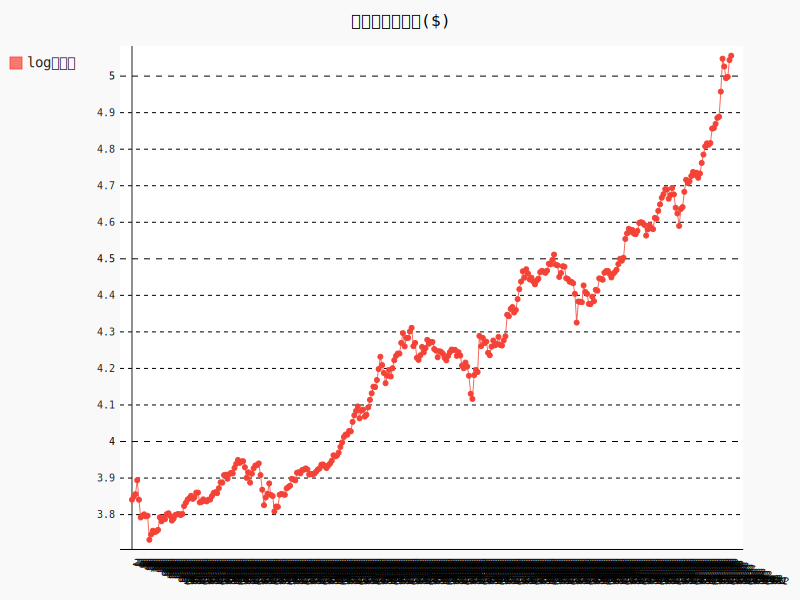

In [93]:
#对数变换消除线性特征
import math
dates = []
months = []
weeks = []
weekdays = []
close = []
for btc_dict in btc_data:
    dates.append(btc_dict['date'])
    months.append(int(btc_dict['month']))
    weeks.append(int(btc_dict['week']))
    weekdays.append(btc_dict['weekday'])
    close.append((float(btc_dict['close'])))
import pygal
line_chart = pygal.Line(x_label_rotation=20,show_minor_x_label=False)
line_chart.title = '收盘价对数变换($)'
line_chart.x_labels = dates
N = 20 #坐标轴每隔20天显示一次
line_chart.x_labels_major = dates[::N]
close_log = [math.log10(_) for _ in close]
line_chart.add('log收盘价',close_log)
line_chart.render_to_file('收盘价对数变换折线图($).svg')
line_chart

ModuleNotFoundError: No module named 'cairosvg'

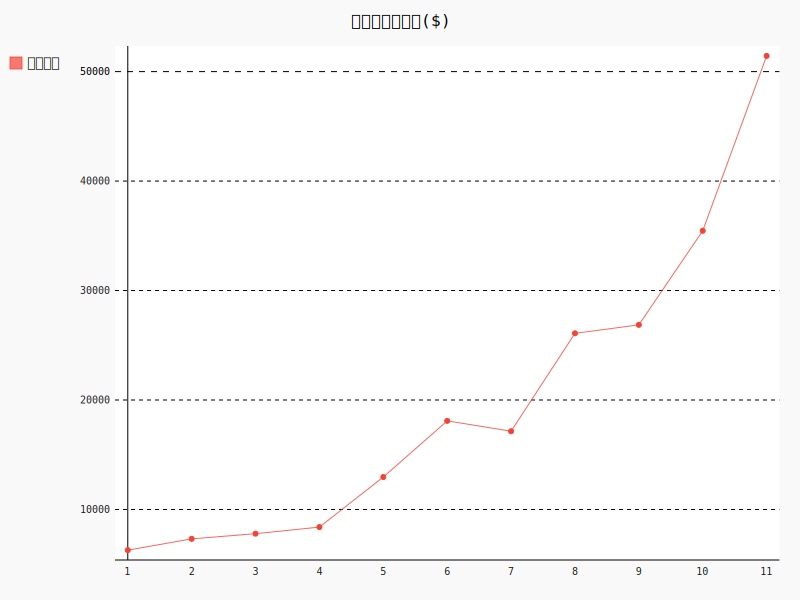

In [94]:
#收盘均价值
from itertools import groupby #用groupby分组
def draw_line(x_data,y_data,title,y_legend):
    xy_map = [] #分组
    for x, y in groupby(sorted(zip(x_data,y_data)),key=lambda _: _[0]):
        y_list  = [v for _, v in y ]
        xy_map.append([x,sum(y_list) / len(y_list)]) #求均值
    x_unique, y_mean = [*zip(*xy_map)] #分离x轴y轴数据
    line_chart = pygal.Line()
    line_chart.title = title
    line_chart.x_labels = x_unique
    line_chart.add(y_legend, y_mean)
    line_chart.render_to_file(title + '.svg')
    return line_chart
idx_month = dates.index('2017-12-01') #绘制2017年1月到11月的数据
line_chart_month = draw_line(months[:idx_month],close[:idx_month],'收盘价月日均值($)','月日均值')
line_chart_month

ModuleNotFoundError: No module named 'cairosvg'

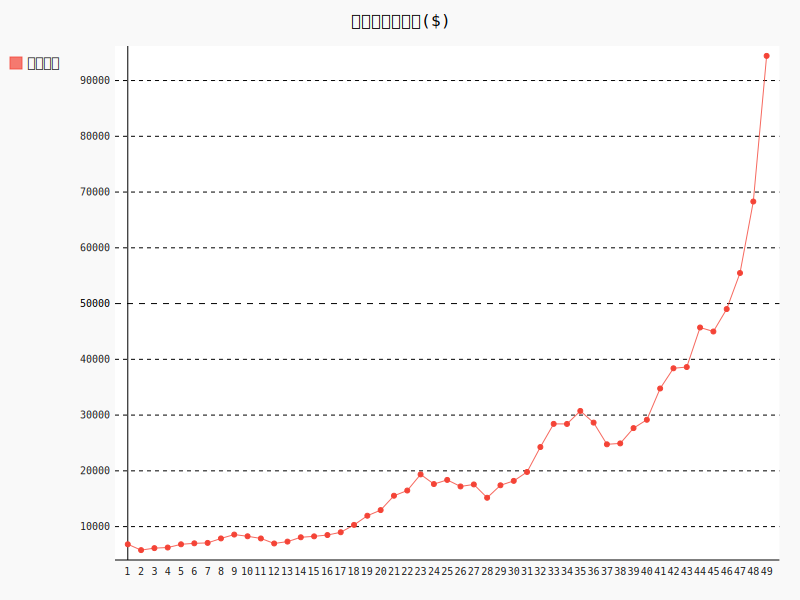

In [95]:
idx_week = dates.index('2017-12-11') #绘制前49周的数据 2017-01-02-2017-12-10
line_chart_week = draw_line(weeks[1:idx_week],close[1:idx_week],'收盘价周日均值($)','周日均值')
line_chart_week

ModuleNotFoundError: No module named 'cairosvg'

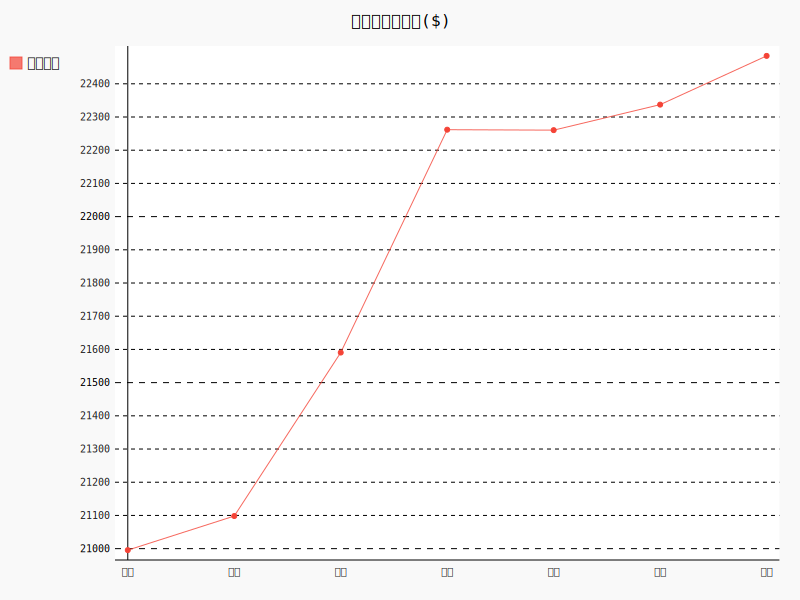

In [96]:
idx_week = dates.index('2017-12-11') #绘制前49周的数据 2017-01-02-2017-12-10
wd = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekdays_int = [wd.index(w) + 1 for w in weekdays[1:idx_week]]
line_chart_weekday = draw_line(weekdays_int,close[1:idx_week],'收盘价星期均值($)','星期均值')
line_chart_weekday.x_labels = ['周一','周二','周三','周四','周五','周六','周日']
line_chart_weekday.render_to_file('收盘价星期均值($).svg')
line_chart_weekday

In [97]:
#绘制仪表盘
with open('收盘价Dashboard.html','w',encoding='utf8') as html_file:
    html_file.write('<html><head><title>收盘价Dashboard</title><metacharset="utf-8"></head><body>\n')
    for svg in [
        '收盘价折线图($).svg','收盘价对数变换折线图($).svg','收盘价月日均值($).svg',
        '收盘价周日均值($).svg','收盘价星期均值($).svg'
    ]:
        html_file.write('   <object type ="image/svg+xml" data="{0}" height=500></object>\n'.format(svg))
        html_file.write('</body></html>')